In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('wordnet_ic')
from nltk import pos_tag, word_tokenize, PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

wordnet_lemmatizer = WordNetLemmatizer()
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

[nltk_data] Error loading wordnet_ic: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [3]:
df1=pd.read_csv("../input/2013_Oklahoma_Tornado-ontopic_offtopic.csv")
#df1.columns=['index','tweet id',' tweet',' label']

In [4]:
df1.index

RangeIndex(start=0, stop=9992, step=1)

In [5]:
df1.head()

tweet id                                              tweet  \
0  '336908711324962817'  @HeatleyJheat44 its barley even raining where ...   
1  '337052158035890176'                   Sorry I can't do anything right.   
2  '339338021751103488'  @mrwendell29: @BradSowderWX  says we have the ...   
3  '336339509077762051'  #honestyhour I like to wear half split running...   
4  '337734129972035584'             I'm too stressed to have a good summer   

       label  
0   on-topic  
1  off-topic  
2   on-topic  
3  off-topic  
4  off-topic

In [6]:
df1.shape

(9992, 3)

In [7]:
for i in range(9992):
    if(df1[' label'][i]=='on-topic'):
        df1[' label'][i]='Oklahoma_Tornado'

In [8]:
df1.head()

tweet id                                              tweet  \
0  '336908711324962817'  @HeatleyJheat44 its barley even raining where ...   
1  '337052158035890176'                   Sorry I can't do anything right.   
2  '339338021751103488'  @mrwendell29: @BradSowderWX  says we have the ...   
3  '336339509077762051'  #honestyhour I like to wear half split running...   
4  '337734129972035584'             I'm too stressed to have a good summer   

              label  
0  Oklahoma_Tornado  
1         off-topic  
2  Oklahoma_Tornado  
3         off-topic  
4         off-topic

In [9]:
df2=pd.read_csv("../input/2013_Queensland_Floods-ontopic_offtopic.csv")

In [10]:
for i in range(10033):
    if(df2[' label'][i]=='on-topic'):
        df2[' label'][i]='Queensland_Floods'

In [11]:
df2.tail()

tweet id  \
10028  '295771687755063297'   
10029  '295733360620363776'   
10030  '295464508074360832'   
10031  '296225704784314368'   
10032  '295764650597949441'   

                                                   tweet              label  
10028  RT @aus_politics: Abbott raises spectre of new...  Queensland_Floods  
10029  RT @bravotrav: Tony Abbott is visiting flood a...  Queensland_Floods  
10030  RT @9NewsGoldCoast: Much of Queensland is toni...  Queensland_Floods  
10031  .@GeodesignB  #flood barrier now set up in #Au...  Queensland_Floods  
10032  Telstra flies in crew to repair flood-damaged ...  Queensland_Floods

In [12]:
df2.head()

tweet id                                              tweet  \
0  '296728042179534848'  @MarkSDobson I always thought that, big lad ai...   
1  '296085045645570048'  @thamonstar a lot of water moving around and a...   
2  '296811076400603136'  Craig Thompson to be extradited to Victoria on...   
3  '295357934387486720'                Sunshine state, sort your shit out.   
4  '296390762210398210'  @MarkPhilippi yeah I saw it. He's a wanker. Pa...   

               label  
0          off-topic  
1  Queensland_Floods  
2          off-topic  
3          off-topic  
4          off-topic

In [13]:
df2.shape

(10033, 3)

In [14]:
df3=pd.read_csv("../input/2012_Sandy_Hurricane-ontopic_offtopic.csv")

In [15]:
for i in range(10008):
    if(df3[' label'][i]=='on-topic'):
        df3[' label'][i]='Sandy_Hurricane'

In [16]:
df3.head()

tweet id                                              tweet  \
0  '262596552399396864'  I've got enough candles to supply a Mexican fa...   
1  '263044104500420609'  Sandy be soooo mad that she be shattering our ...   
2  '263309629973491712'  @ibexgirl thankfully Hurricane Waugh played it...   
3  '263422851133079552'  @taos you never got that magnificent case of B...   
4  '262404311223504896'  I'm at Mad River Bar &amp; Grille (New York, N...   

             label  
0        off-topic  
1  Sandy_Hurricane  
2        off-topic  
3        off-topic  
4        off-topic

In [17]:
df3.shape

(10008, 3)

In [18]:
df4=pd.read_csv("../input/2013_Boston_Bombings-ontopic_offtopic.csv")

In [19]:
for i in range(10012):
    if(df4[' label'][i]=='on-topic'):
        df4[' label'][i]='Boston_Bombings'

In [20]:
df4.head()

tweet id                                              tweet  \
0  '325208201740029952'  Funny how I got twenty minutes of sleep last n...   
1  '325301650791215106'                            I just wanna go outside   
2  '325182966332530688'  This is fucking crazy. Suspect # 2 has like 2 ...   
3  '324654539850539009'  @J_Adams91 oops, someone doesn't like to be to...   
4  '323630018536275968'   Let me love you @GavinQuin you know who else too   

             label  
0        off-topic  
1        off-topic  
2  Boston_Bombings  
3        off-topic  
4        off-topic

In [21]:
df4.shape

(10012, 3)

In [22]:
df5=pd.read_csv("../input/2013_West_Texas_Explosion-ontopic_offtopic.csv")

In [23]:
for i in range(10006):
    if(df5[' label'][i]=='on-topic'):
        df5[' label'][i]='West_Texas_Explosion'

In [24]:
df5.head()

tweet id                                              tweet  \
0  '325478991496630272'             @iAmNotA_Dyke ..nah, I'm fine with it.   
1  '325422389854883840'         Oomf still on that bullshit from lastnight   
2  '325057083135361025'          -NO Handouts Here I Work Hard For Mines !   
3  '324742043211558912'  @theatticdemos @youranonnews fertilizer plant ...   
4  '325471165026025474'  @_SayMyNameLOUD: Got ate out by a dog !! #Cryi...   

                  label  
0             off-topic  
1             off-topic  
2             off-topic  
3  West_Texas_Explosion  
4             off-topic

In [25]:
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [26]:
df

tweet id  \
0      '336908711324962817'   
1      '337052158035890176'   
2      '339338021751103488'   
3      '336339509077762051'   
4      '337734129972035584'   
5      '338469535499816960'   
6      '338404118324449280'   
7      '337056664664551424'   
8      '337766215911079936'   
9      '337753667480473600'   
10     '339292431566635010'   
11     '339322499470856192'   
12     '337680341940711426'   
13     '336606544676392961'   
14     '338883184076922881'   
15     '338430991905476608'   
16     '339512032338518017'   
17     '339453067256815616'   
18     '336906122415968256'   
19     '338541532162433024'   
20     '338804795911573504'   
21     '336709756234383361'   
22     '336270541222723585'   
23     '339063792497463298'   
24     '337772743061819392'   
25     '338386148294529025'   
26     '336614657420820480'   
27     '338863451504013312'   
28     '338041161564422146'   
29     '336564386665746432'   
...                     ...   
50021  '324714615516835840'   
50022  '324729611340623872'   
50023  '325256926625673217'   
50024  '324722538766802944'   
50025  '324820578622136320'   
50026  '324740317502906368'   
50027  '326734923748749312'   
50028  '324871879347273728'   
50029  '324904021456453634'   
50030  '324861821863477248'   
50031  '324736675907522561'   
50032  '324729051010961409'   
50033  '324777457179828225'   
50034  '324776327230132224'   
50035  '324754573497597954'   
50036  '325970515015651329'   
50037  '324789190107738112'   
50038  '325100359133573121'   
50039  '324724847626313728'   
50040  '324877435566956545'   
50041  '324738059914584065'   
50042  '325246611599003648'   
50043  '325288022834806785'   
50044  '325197596756946945'   
50045  '324784247447646208'   
50046  '324923170484264960'   
50047  '327877792828125184'   
50048  '325283878313005056'   
50049  '324745332971958272'   
50050  '324727697429372928'   

                                                   tweet                 label  
0      @HeatleyJheat44 its barley even raining where ...      Oklahoma_Tornado  
1                       Sorry I can't do anything right.             off-topic  
2      @mrwendell29: @BradSowderWX  says we have the ...      Oklahoma_Tornado  
3      #honestyhour I like to wear half split running...             off-topic  
4                 I'm too stressed to have a good summer             off-topic  
5      @l_guadarrama: It must have been love, but it'...             off-topic  
6      @w3dn3sday99 We got the remnants of hurricanes...             off-topic  
7               Fear is only as deep as the mind allows.             off-topic  
8                         Taz missed out. Sucks for him.             off-topic  
9      @_chintiaa_: @The_Future_405 lol, no I'm not. ...             off-topic  
10                             I'm about to go to sleep.             off-topic  
11     Off to the gym to take some of the jiggle outt...             off-topic  
12                     @JordynnnA i honestly hate u bye.             off-topic  
13                        Hopefully Tulsa won't get hit.      Oklahoma_Tornado  
14     With these guys on the river!:) So much fun! h...             off-topic  
15     @NicDog_ lol I guess you never wont me to rt a...             off-topic  
16     my TL forever talkin about sex. like damn chil...             off-topic  
17     YOU COME TO MY HOUSE, DISRESPECT MY AUTHORITY,...             off-topic  
18     By myself callin her ya name... Ladies tell me...             off-topic  
19     @MercedeezBell let me switch it up  http://t.c...             off-topic  
20                                 Hope you know I don't             off-topic  
21       @ConceitedKid_ I miss you bro come back to Mee.             off-topic  
22     I'm thankful that the tornado missed my street...      Oklahoma_Tornado  
23     Those who excel in it seldom excel in anything...             off-topic  
24     OKC National Memorial @ Oklahoma City National...             of

In [27]:
df.tail()

tweet id  \
50046  '324923170484264960'   
50047  '327877792828125184'   
50048  '325283878313005056'   
50049  '324745332971958272'   
50050  '324727697429372928'   

                                                   tweet                 label  
50046  @danshirley Fertilizer plant explosion late la...  West_Texas_Explosion  
50047  Ok I'm NOT going to put up with people compari...  West_Texas_Explosion  
50048  RT @BGEA: A chaplain just prayed w/man who was...  West_Texas_Explosion  
50049  US: Stil no confirmed deaths from fertilizer p...  West_Texas_Explosion  
50050  RT @LifeAsBros: Thoughts and prayers go out to...  West_Texas_Explosion

In [28]:
df.shape

(50051, 3)

In [29]:
df.columns

Index(['tweet id', ' tweet', ' label'], dtype='object')

In [30]:
df[' tweet']=df[' tweet'].replace('#',' ',regex=True)

In [31]:

tfidf_vectorizer=TfidfVectorizer(use_idf=True,stop_words='english')
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df[' tweet'])

tfidf_vectorizer_vectors.shape

(50051, 61303)

In [32]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
#place tf-idf values in a pandas data frame
df_l = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(),index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df_l =df_l.sort_values(by=["tfidf"],ascending=False)
df_l 

tfidf
heatleyjheat44   0.609143
barley           0.592800
raining          0.451629
lol              0.271227
00               0.000000
paulgazda        0.000000
paulazinger      0.000000
paulbellis       0.000000
paulcdavey       0.000000
paulcunningham   0.000000
paulettebleam    0.000000
paulettemccrory  0.000000
pauleubanks1     0.000000
pauleyp          0.000000
paulfidalgo      0.000000
paulfolger       0.000000
paulhbeckwith    0.000000
paulgggunter     0.000000
paulaebbenwbz    0.000000
paulie           0.000000
pauline          0.000000
pauljolleyai12   0.000000
paull            0.000000
paullewis        0.000000
paulmcwilliams1  0.000000
paulpierce34     0.000000
paulpisasale     0.000000
paulrowney       0.000000
pauls            0.000000
paulteijeiro     0.000000
...                   ...
fletcher         0.000000
fletch           0.000000
flesh            0.000000
fleming          0.000000
flatbush         0.000000
flatheadjake     0.000000
flatmates        0.000000
flats            0.000000
flatten          0.000000
flattened        0.000000
flattening       0.000000
flattens         0.000000
flattered        0.000000
flatts           0.000000
flaunts          0.000000
flavatown        0.000000
flavor           0.000000
flavored         0.000000
flaw             0.000000
flawlessswaqx3   0.000000
flaws            0.000000
fldjj0o4         0.000000
flea             0.000000
fleas            0.000000
flee             0.000000
fleeing          0.000000
fleet            0.000000
fleetwood        0.000000
fleetwoodmac     0.000000
által            0.000000

[61303 rows x 1 columns]

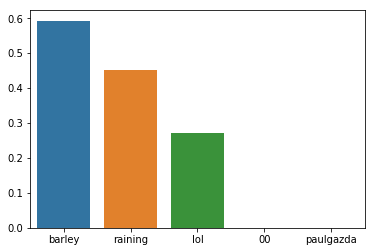

In [33]:
sns.barplot(x=df_l['tfidf'][1:6].index,y=df_l['tfidf'][1:6].values)

In [34]:
x=tfidf_vectorizer.transform(df[' tweet'])
y=df[' label']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.4,random_state=42)

In [36]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = logreg.predict(x_test)


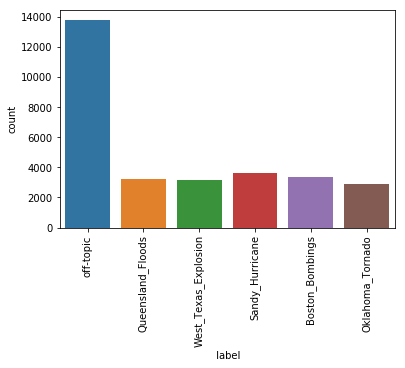

In [38]:
plt.xticks(rotation=90)
sns.countplot(y_test)

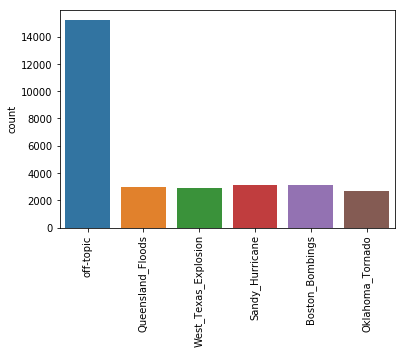

In [39]:
plt.xticks(rotation=90)
sns.countplot(y_pred)

In [40]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

     Boston_Bombings       0.95      0.86      0.90      3383
    Oklahoma_Tornado       0.94      0.87      0.90      2911
   Queensland_Floods       0.98      0.92      0.95      3200
     Sandy_Hurricane       0.96      0.83      0.89      3639
West_Texas_Explosion       0.97      0.90      0.93      3159
           off-topic       0.87      0.97      0.92     13739

            accuracy                           0.92     30031
           macro avg       0.95      0.89      0.92     30031
        weighted avg       0.92      0.92      0.92     30031



In [41]:
 
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 2919     0     0     0    44   420]
 [    1  2534     0     4     3   369]
 [    0     3  2945     3     0   249]
 [    0     0     6  3026     1   606]
 [   38     0     0     1  2847   273]
 [  129   155    43   104    39 13269]]


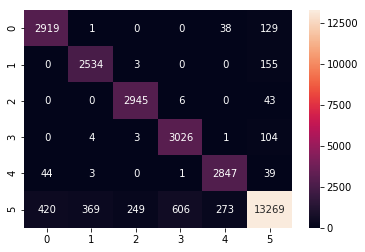

In [42]:
sns.heatmap(metrics.confusion_matrix(y_pred,y_test),annot=True,fmt='2.0f')

In [43]:
for i in range(len(y_test)):
    print(df[' tweet'][y_test.index[i]])
    print(y_pred[i])
    print(df[' label'][y_test.index[i]])
    print("*************************************************************************")

The bases are loaded and Pujols is up... WHY.
off-topic
off-topic
*************************************************************************
@WhichJoel lets go get tatted b.
off-topic
off-topic
*************************************************************************
I'm keeping all my things charging all day today
off-topic
off-topic
*************************************************************************
RT @7NewsBrisbane: Foam from rough waves at Alexandra Headland resembles snow on the Sunshine Coast  staysafe  bigwet  queensland  flood ...
Queensland_Floods
Queensland_Floods
*************************************************************************
@nicolezee exactly. I'm living the life right mow
off-topic
off-topic
*************************************************************************
RT @ABC: 75 to 100 houses, businesses completely destroyed around Texas fertilizer plant explosion http://t.co/ZlnCEsAAp2 http://t.co/5Z ...
West_Texas_Explosion
West_Texas_Explosion
************